### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [11]:

# Parameters, try to change them and see what happens
N_epochs = 25 # number of epochs
sigma =0.1 # noise level
N_train = 2500 # number of training data
# N_batch = math.floor(N_train/16) # batch size
N_batch = 32 

neur_per_layer = 7 # number of neurons per layer

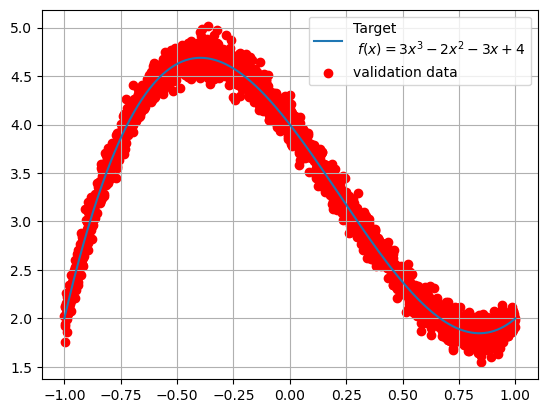

In [12]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
# generate training inputs

# Polynomial function
def polynomial(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_train)
x_valid.sort() # for a better plot
y_target = polynomial(x_valid) # ideal (target) linear function

y_train = np.random.normal(polynomial(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polynomial(x_valid), sigma)

plt.plot(x_valid, y_target, label='Target\n $f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Putting Universal approximation theorem at test:

In [13]:
# compose the NN model

model = tf.keras.Sequential()
act = 'tanh'
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 7)                 14        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/25
79/79 [==============================] - 1s 7ms/step - loss: 1.3464 - mse: 1.3464 - val_loss: 0.4426 - val_mse: 0.4426
Epoch 2/25
79/79 [==============================] - 0s 5ms/step - loss: 0.4328 - mse: 0.4328 - val_loss: 0.4120 - val_mse: 0.4120
Epoch 3/25
79/79 [==============================] - 0s 5ms/step - loss: 0.3991 - mse: 0.3991 - val_loss: 0.3685 - val_mse: 0.3685
Epoch 4/25
79/79 [==============================] - 0s 5ms/step - loss: 0.3680 - mse: 0.3680 - val_loss: 0.3425 - val_mse: 0.3425
Epoch 5/25
79/79 [==============================] - 0s 5ms/step - loss: 0.3424 - mse: 0.3424 - val_loss: 0.3197 - val_mse: 0.3197
Epoch 6/25
79/79 [==============================] - 0s 5ms/step - loss: 0.3206 - mse: 0.3206 - val_loss: 0.3026 - val_mse: 0.3026
Epoch 7/25
79/79 [==============================] - 0s 5ms/step - loss: 0.3005 - mse: 0.3005 - val_loss: 0.2819 - val_mse: 0.2819
Epoch 8/25
79/79 [==============================] - 0s 4ms/step - loss: 0.2790 - mse: 0.27

In [15]:
# return weights and biases
model.get_weights()

[array([[-1.9441469]], dtype=float32),
 array([-0.13973568], dtype=float32),
 array([[ 0.546501  , -0.4446197 ,  0.5112554 , -0.37674946,  0.51526934,
          1.0667251 ,  1.5766662 ]], dtype=float32),
 array([ 0.59553   , -0.7117528 , -0.42457208, -0.80114216,  0.11276983,
        -1.3473119 ,  0.13936153], dtype=float32),
 array([[ 0.61414385],
        [-0.78172714],
        [-0.84977114],
        [-0.9276545 ],
        [-0.12867102],
        [-1.808087  ],
        [ 1.324213  ]], dtype=float32),
 array([0.7516888], dtype=float32)]

In [16]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389

Test loss: 0.03886139392852783
Test accuracy: 0.03886139392852783


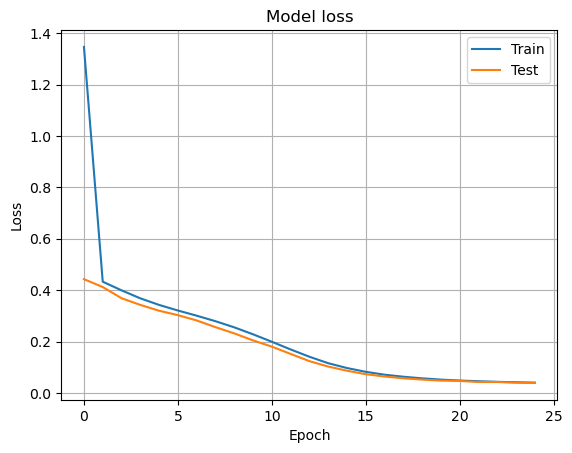

In [17]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# print data to file
epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
df = pd.DataFrame(data)
df.to_csv(f'DATA/polynomial/Neuron/loss{neur_per_layer}.dat', index=False, header = False, sep = ' ')

2/2 [==============================] - 0s 4ms/step


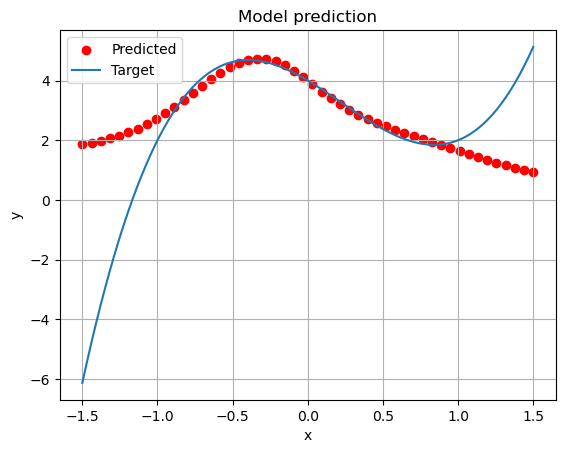

In [18]:
# x_predicted = np.random.uniform(-1, 1, 1000)
x_predicted = np.linspace(-1.5, 1.5, 50)
y_predicted = model.predict(x_predicted)
x_plot = np.linspace(-1.5, 1.5, 100)
y_plot = polynomial(x_plot) 
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_plot, y_plot, label='Target')
plt.title('Model prediction')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-1,1)
plt.legend()
plt.grid(True)
plt.show()
# Print the data used for training
pd.DataFrame({'x': x_predicted, 'y': y_predicted.flatten()}).to_csv(f'DATA/polynomial/Neuron/neuron{neur_per_layer}.dat', index=False, header=False, sep=' ')